In [1]:
import cv2
import os
import random
import matplotlib.pylab as plt
import glob
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
abs_path = os.path.abspath('.')
img_path = os.path.join(abs_path, 'imgs/Selected/*')

In [3]:
img_path

'/home/felipe/ML_Xray/imgs/Selected/*'

In [4]:
images = glob.glob(os.path.join(img_path, "*.png"))

In [5]:
images[0:10]

['/home/felipe/ML_Xray/imgs/Selected/Consolidation/00013922_008.png',
 '/home/felipe/ML_Xray/imgs/Selected/Consolidation/00005756_001.png',
 '/home/felipe/ML_Xray/imgs/Selected/Consolidation/00011925_064.png',
 '/home/felipe/ML_Xray/imgs/Selected/Consolidation/00027465_019.png',
 '/home/felipe/ML_Xray/imgs/Selected/Consolidation/00004893_054.png',
 '/home/felipe/ML_Xray/imgs/Selected/Consolidation/00002785_005.png',
 '/home/felipe/ML_Xray/imgs/Selected/Consolidation/00016240_009.png',
 '/home/felipe/ML_Xray/imgs/Selected/Consolidation/00008522_042.png',
 '/home/felipe/ML_Xray/imgs/Selected/Consolidation/00018643_003.png',
 '/home/felipe/ML_Xray/imgs/Selected/Consolidation/00015770_022.png']

In [6]:
len(images)

51759

In [7]:
labels = pd.read_csv('Data_Entry_2017.csv')

In [8]:
labels.head(10)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
5,00000003_001.png,Hernia,1,3,74,F,PA,2500,2048,0.168,0.168,NaN
6,00000003_002.png,Hernia,2,3,75,F,PA,2048,2500,0.168,0.168,NaN
7,00000003_003.png,Hernia|Infiltration,3,3,76,F,PA,2698,2991,0.143,0.143,NaN
8,00000003_004.png,Hernia,4,3,77,F,PA,2500,2048,0.168,0.168,NaN
9,00000003_005.png,Hernia,5,3,78,F,PA,2686,2991,0.143,0.143,NaN


/home/felipe/ML_Xray/imgs/Selected/Pneumonia/00008470_008.png
/home/felipe/ML_Xray/imgs/Selected/Infiltration/00023138_001.png
/home/felipe/ML_Xray/imgs/Selected/Consolidation/00000132_002.png


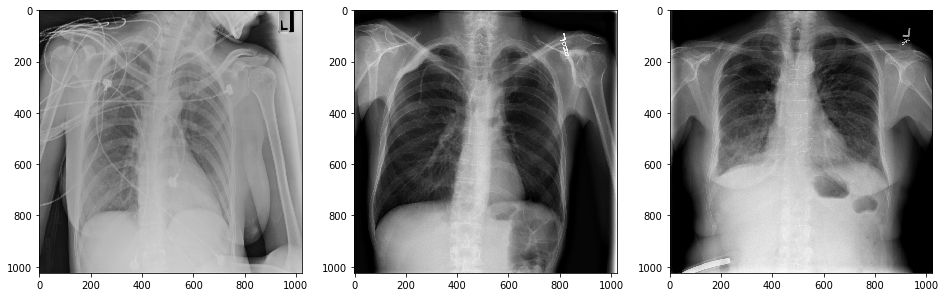

In [9]:
r = random.sample(images, 3)
plt.figure(figsize=(16,16))
plt.subplot(131)
plt.imshow(cv2.imread(r[0]))
print(r[0])
print(r[1])
print(r[2])

plt.subplot(132)
plt.imshow(cv2.imread(r[1]))

plt.subplot(133)
plt.imshow(cv2.imread(r[2]))
plt.show()

In [10]:
os.path.basename(images[0])

'00013922_008.png'

In [11]:
def create_symlink(src_dir, link_name, dst_dir='./', target_is_dir=False):
    if not os.path.exists(dst_dir + link_name):
        os.symlink(src=src_dir , dst=dst_dir + link_name, target_is_directory=target_is_dir)

In [12]:
# Creat symbolic link for all images
for img in tqdm(images,total=len(images)):
    base = os.path.basename(img)
    create_symlink(img, base, dst_dir='All images/')


100%|██████████| 51759/51759 [00:01<00:00, 49607.52it/s]


In [22]:
#create_symlink(images[0], 'teste_link.png', dst_dir='No Finding/')

In [24]:
def select_images_pneumothorax():
    disease = 'Pneumothorax'
    for img in tqdm(images,total=len(images)):
        base = os.path.basename(img)
        finding = labels["Finding Labels"][labels["Image Index"] == base].values[0]
        if disease in finding:
            create_symlink(img, base, dst_dir='Selected/Pneumothorax/')
    return

In [25]:
select_images()

In [27]:
def select_images_No_Finding():
    disease = 'No Finding'
    for img in tqdm(images,total=len(images)):
        base = os.path.basename(img)
        finding = labels["Finding Labels"][labels["Image Index"] == base].values[0]
        if disease in finding:
            create_symlink(img, base, dst_dir='Selected/No Finding/')
    return

In [28]:
select_images_No_Finding()

100%|██████████| 9999/9999 [00:34<00:00, 291.86it/s]


In [14]:
def select_images_Atelectasis():
    disease = 'Atelectasis'
    for img in tqdm(images,total=len(images)):
        base = os.path.basename(img)
        finding = labels["Finding Labels"][labels["Image Index"] == base].values[0]
        if disease in finding:
            create_symlink(img, base, dst_dir='Selected/Atelectasis/')
    return

In [15]:
select_images_Atelectasis()

100%|██████████| 9999/9999 [00:33<00:00, 294.61it/s]


In [16]:
def select_images_Effusion():
    disease = 'Effusion'
    for img in tqdm(images,total=len(images)):
        base = os.path.basename(img)
        finding = labels["Finding Labels"][labels["Image Index"] == base].values[0]
        if disease in finding:
            create_symlink(img, base, dst_dir='Selected/Effusion/')
    return

In [17]:
select_images_Effusion()

100%|██████████| 9999/9999 [00:34<00:00, 293.82it/s]


In [18]:
def select_images_Infiltration():
    disease = 'Infiltration'
    for img in tqdm(images,total=len(images)):
        base = os.path.basename(img)
        finding = labels["Finding Labels"][labels["Image Index"] == base].values[0]
        if disease in finding:
            create_symlink(img, base, dst_dir='Selected/Infiltration/')
    return

In [19]:
select_images_Infiltration()

100%|██████████| 9999/9999 [00:34<00:00, 293.65it/s]
